<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
pd.set_option('float_format', '{:f}'.format)

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')

In [4]:
data.sample(5, random_state=42)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7944,14,2990000.000000,35.000000,2019-03-29T00:00:00,1,NaN,17.000000,16.000000,10,NaN,...,9.000000,NaN,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7539,8,3790000.000000,33.000000,2018-12-18T00:00:00,1,2.500000,7.000000,18.000000,2,NaN,...,5.600000,NaN,Санкт-Петербург,27455.000000,8621.000000,1.000000,217.000000,0.000000,NaN,90.000000
9889,1,12990000.000000,191.000000,2017-08-31T00:00:00,7,3.300000,5.000000,136.100000,2,NaN,...,16.000000,0.000000,Санкт-Петербург,26856.000000,5704.000000,0.000000,NaN,1.000000,1017.000000,77.000000
649,1,7210000.000000,61.500000,2018-10-02T00:00:00,3,2.920000,5.000000,43.200000,4,NaN,...,5.700000,1.000000,Санкт-Петербург,25407.000000,3982.000000,1.000000,483.000000,0.000000,NaN,89.000000
13768,10,550000.000000,36.000000,2017-08-22T00:00:00,1,NaN,2.000000,20.000000,1,NaN,...,8.000000,0.000000,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,92.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,23699.000000,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6541548.771552,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,10887013.267545,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,12190.000000,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3400000.000000,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4650000.000000,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6800000.000000,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,763000000.000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
for column in data.columns:
    print(column, data[column].isna().mean())

total_images 0.0
last_price 0.0
total_area 0.0
first_day_exposition 0.0
rooms 0.0
ceiling_height 0.38799105447487237
floors_total 0.0036288450989493226
living_area 0.08029874678256467
floor 0.0
is_apartment 0.8829064517490189
studio 0.0
open_plan 0.0
kitchen_area 0.09612219924891345
balcony 0.4860542638929913
locality_name 0.002067597788936242
airports_nearest 0.23384952951601334
cityCenters_nearest 0.23287902443141062
parks_around3000 0.232836828558167
parks_nearest 0.6590995400649816
ponds_around3000 0.232836828558167
ponds_nearest 0.6155955947508334
days_exposition 0.13422507278788134


### Вывод

Обнаружены пропуски в 14 столбцах:  
ceiling_height 38%  
floors_total 0,3%  
living_area 8%  
is_apartment 88%  
kitchen_area 9%  
balcony 48%  
locality_name 0,2%  
airports_nearest 23,38%  
cityCenters_nearest 23,28%  
parks_around3000 23,28%  
parks_nearest 66%  
ponds_around3000 23,28%  
ponds_nearest 62%  
days_exposition 13%  
Аномально выглядят минимальное и максимальное значение в столбце 'ceiling_height' - потолки ниже двух метров и аж до 100 метров.  
Аномально выглядит минимальное и максимальное значение в столбце 'living_area'и 'kitchen_area'. Размер около квадратного метра или вообще отсутствие значения, возможно, связаны с открытой планировкой. Максимальное значение так же вызывает сомнение.  
Аномально выглядят нулевые значения кол-ва комнат, особенно в тех случаях, где у квартиры нет метки свободная планировка.  
Аномально выглядит минимальное значение в столбце 'last_price'

## Предобработка данных

Минимальная высота потолка согласно СНиП для жилых помещений от 2,5 (от 2,1 в мансардных помещениях) до 3,2 м. Считаю кол-во объявлений, ниже этой планки.

In [8]:
len(data.query('ceiling_height < 2.1'))

14

Таких значенийй меньше 1%. Удаляю эти строки. Пропуски заполним медианным значением, исключив лоты, не укладывающиеся в СНиП.

In [9]:
data = data.drop(data.query('ceiling_height < 2.1').index)
median_ceiling_height = data[(data['ceiling_height'] > 2.5) & (data['ceiling_height'] < 3.2)]['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(median_ceiling_height)

В столбце 'floors_total' пропусков всего 0,3%. Можно было бы указать значение столбца  'floor'. Дом явно не ниже. Но это повлияет на данные при группировке "последних" этажей. Можно было бы восстановить признак при наличаи адреса. Но в данной ситуации, кол-во пропусков не значительное, поэтому удаляем эти строки. И заменим тип значений на целое число

In [10]:
data = data.dropna(subset = ['floors_total'])
data['floors_total'] = data['floors_total'].astype('int')

Доля пропусков в столбце 'locality_name' всего 0,2%. Восстановить или заполнить сложно. Удаляю.

In [11]:
data = data.dropna(subset = ['locality_name'])

Скорее всего пропуск в столбце 'is_apartment' означает, что лот не является апартаментом. Заполняю.

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Аналогично в столбце 'balcony'. Скорее всего пропуск означает, что балкона нет. И заменим тип значений на целое число.

In [13]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

In [14]:
data['last_price'] = data['last_price'].astype('int')
data['last_price'].sort_values().head(10)

8793      12190
17456    430000
14911    430000
16274    440000
17676    450000
16219    450000
5698     450000
9581     450000
21912    470000
18867    470000
Name: last_price, dtype: int64

Странный лот с ценой меньше 20 тысяч. Либо потерялись нули. Либо указана цена за квадратный метр. Удаляю.

In [15]:
data = data.drop(data.query('last_price == 12190').index)

Возможно, пропуски в стобцах 'living_area' и 'kitchen_area' связаны с тем, что квартира имеет открытую планировку. Смотрю пересечения.

In [16]:
data[data['open_plan'] == True]['living_area'].isna().sum()

5

In [17]:
data[data['open_plan'] == True]['kitchen_area'].isna().sum()

67

Для 'living_area' пересекается всего 5 значений. Связи нет.  
Для 'kitchen_area' таких значений 67. Остальные пропуски не связаны с параметром открытой планировки.  
Смотрю, в каком кол-ве объявлений кол-во комнат указан ноль и не стоит пометка "открытая планировка"

In [18]:
display(len(data[(data['open_plan'] != True) & (data['rooms'] == 0)]))
data = data.drop(data[(data['open_plan'] != True) & (data['rooms'] == 0)].index)

135

Это может быть ошибка заполнения данных: то ли кол-во комнат не проставлено, то ли признак открытой планировки. Строк немного.  Удаляю.

In [19]:
data[data['kitchen_area'].isna() == True]['living_area'].isna().sum()

1418

У 6% объявлений пропуски в столбцах 'living_area' и 'kitchen_area'. Это много. Заполнять значения столбцов стоит медианой. Но для начала выявляю кол-во объявлений, в которых сумма жилой зоны и кухни - больше общей площади квартиры. Избавляюсь от таких строк.

In [20]:
display(len(data.query('living_area + kitchen_area >= total_area')))
data = data.drop(data.query('living_area + kitchen_area > total_area').index)

134

Заполняю пропуски в столбцх 'living_area' и 'kitchen_area' медианой с учётом общей площади.

In [21]:
def total_area_group (area):
    if area <= 20:
        return 'до 20'
    if area <= 30:
        return '(20, 30]'
    if area <= 40:
        return '(30, 40]'
    if area <= 50:
        return '(40, 50]'
    if area <= 60:
        return '(50, 60]'
    if area <= 70:
        return '(60, 70]'
    if area <= 80:
        return '(70, 80]'
    if area <= 90:
        return '(80, 90]'
    if area < 100:
        return '(90, 100]'
    return 'больше 100'

data['area_group'] = data['total_area'].apply(total_area_group)

for unic_area_group in data['area_group'].unique():
    median_living_area = data[(data['area_group'] == unic_area_group)]['living_area'].median()
    data.loc[(data['area_group'] == unic_area_group), 'living_area'] = data.loc[(data['area_group'] == unic_area_group), 'living_area'].fillna(median_living_area)
    median_kitchen_area = data[(data['area_group'] == unic_area_group)]['kitchen_area'].median()
    data.loc[(data['area_group'] == unic_area_group), 'kitchen_area'] = data.loc[(data['area_group'] == unic_area_group), 'kitchen_area'].fillna(median_kitchen_area)
    

К сожалению, этот метод не идеален. После повторной проверки появились несоответствия общей площади и суммы жилого помещения и кухни. Удаляю.

In [22]:
display(len(data.query('living_area + kitchen_area >= total_area')))
data = data.drop(data.query('living_area + kitchen_area >= total_area').index)

149

Меняю тип данных в столбце 'first_day_exposition' и округляю до дня.

In [23]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

Пропуски в столбце 'days_exposition' могут означать, что к моменту выгрузки данных квартира не была продана. Можно заполнить данные разницей между датой размещения объявления, до даты последнего размещённого объявления в выгрузке.

In [24]:
last_date = data['first_day_exposition'].max()
data['days_exposition'] = data['days_exposition'].fillna((last_date - data['first_day_exposition']).dt.days)

In [25]:
data['first_day_exposition'].dt.year.value_counts()

2018    8333
2017    8041
2019    2823
2016    2717
2015    1157
2014     131
Name: first_day_exposition, dtype: int64

Проверка на дубликаты.

In [26]:
data.duplicated().sum()

0

Удалённых данных 1,7%  
Найдено несоответствие данных в стобцах с кол-ом комнат и информацией об открытой планировке.  
Найдены несоответствие данных в стобцах с общим метражем квартиры, жилой площадью и площадью кухни: у 134 объявлений общая площадь картиры была меньше или равна сумме жилых помещений и кухни.  
Заменен тип в стобцах с кол-вом этажей, балконов, ценой на момент снятия публикации и датой размещения объявления.

## Расчёты и добавление результатов в таблицу

Считаю и добавляю цену квадратного метра

In [27]:
data['square_meter_price'] = data['last_price'] / data ['total_area']

День недели, месяц и год публикации объявления;

In [28]:
data['week_day_exposition'] = data['first_day_exposition'].dt.weekday

Добавляю категорию по этажу квартиры: первый, последний, другой;

In [29]:
def floor_group (row):
    floor = row['floor']
    fl_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == fl_total:
        return 'последний'
    return 'другой'
data['floor_group'] = data.apply(floor_group, axis = 1)

Добавляю соотношение жилой и общей площади, cотношение площади кухни к общей. 

In [30]:
data['living_area_ratio'] = data ['living_area'] / data ['total_area']
data['kitchen_area_ratio'] = data ['kitchen_area'] / data ['total_area']

In [31]:
data['first_day_exposition'] = data['first_day_exposition'].dt.to_period('M')

In [32]:
data['month_exposition'] = data['first_day_exposition'].dt.month

## Исследовательский анализ данных

Строим график по параметру общей площади.

<AxesSubplot:>

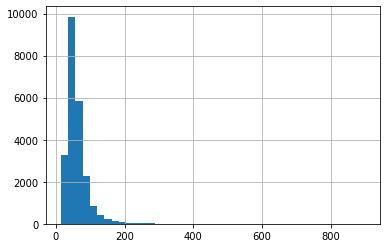

In [33]:
data['total_area'].hist(bins = 42)

(0.0, 150.0)

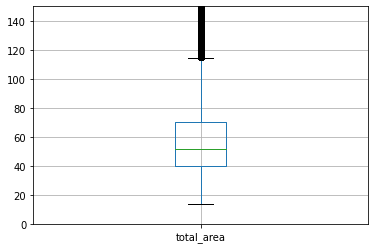

In [34]:
data.boxplot(column=['total_area'])
plt.ylim([0, 150])

Большая часть размещённых объявлений: квартиры площадью от 20 до 120 квадратных метров. Основной объём объявлений составляют квартиры от 40 до 70 кв.метров. 
Сторим гистограмму по параметру цены

<AxesSubplot:>

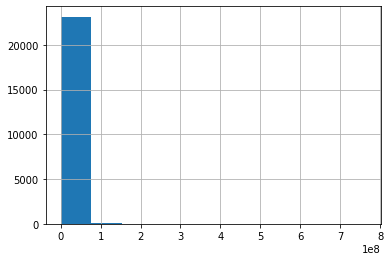

In [35]:
data['last_price'].hist(bins = 10)

<AxesSubplot:>

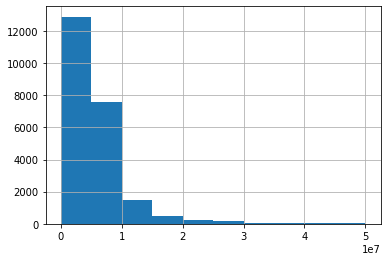

In [36]:
data['last_price'].hist(range = (0, 50000000), bins = 10)

Основная часть квартир продатся в пределах 10 млн. за лот.  
Строим график по параметру кол-во комнат

<AxesSubplot:>

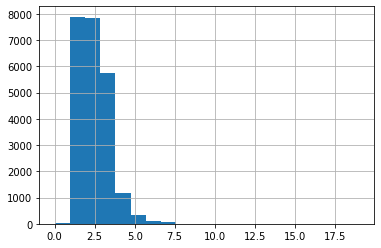

In [37]:
data['rooms'].hist(bins = 20)

Большая часть объявлений - квартиры в которых не больше 3 комнат.Встречаются и многокомнатные варианты, свыше 7 комнат. Но это довольно редкие объявления.    
Строим гистограмму по высоте потолков

<AxesSubplot:>

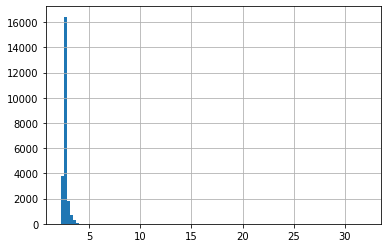

In [38]:
data['ceiling_height'].hist(bins = 100)

<AxesSubplot:>

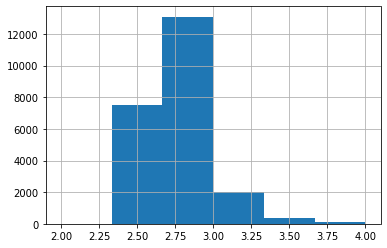

In [39]:
data['ceiling_height'].hist(range = (2, 4), bins = 6)

(0.0, 10.0)

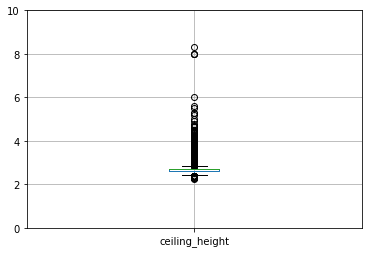

In [40]:
data.boxplot(column=['ceiling_height'])
plt.ylim([0, 10])

Высота потолков укладывается в значение от 2,4 до 3 метров. Встречаются редкие значения с высотой ниже (от объявлений с потолками ниже 2,1 метра избавилась на этапе преподготовки данных) Ещё более редкие лоты с высотой выше 6 метров. Из общей массы выбиваются дворцы со 100 метровыми потолками  
Строю гистограмму по кол-ву дней в продаже.

<AxesSubplot:>

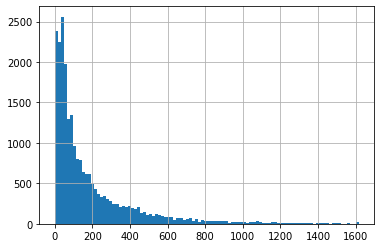

In [41]:
data['days_exposition'].hist(bins = 100)

In [42]:
data['days_exposition'].describe()

count   23202.000000
mean      186.455133
std       233.903672
min         0.000000
25%        43.000000
50%        95.000000
75%       238.000000
max      1618.000000
Name: days_exposition, dtype: float64

Основная часть квартир ждёт покупателя не более 250 дней.  
Половина покупок совершается в первые три месяца.  
Быстрой можно считать продажу в первые 6 недель размещения.  
Строю гистограммы по доле жилой площади и доле кухни.

<AxesSubplot:>

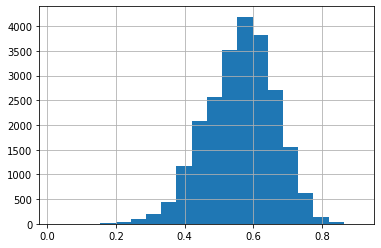

In [43]:
data['living_area_ratio'].hist(bins=20)

<AxesSubplot:>

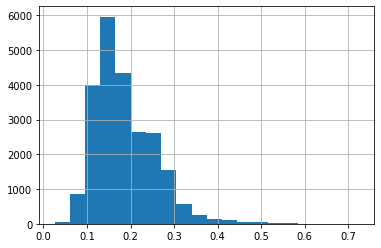

In [44]:
data['kitchen_area_ratio'].hist(bins=20)

Убираю редкие и выбивающиеся значения. В первую очередь - квартиры дороже 50 млн, лоты с потолками выше 4 метров, квартиры с долей жилой площади ниже 30% и с кухней больше 30% и многокомнатные экземляры, свыше 5 комнат)

Сохраняю в отдельный датасет данные после предобработки.

In [46]:
data_not_filtred = data
data_not_filtred.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,week_day_exposition,living_area_ratio,kitchen_area_ratio,month_exposition
count,23202.000000,23202.000000,23202.000000,23202.000000,23202.000000,23202.000000,23202.000000,23202.000000,23202.000000,23202.000000,...,17840.000000,7943.000000,17840.000000,8921.000000,23202.000000,23202.000000,23202.000000,23202.000000,23202.000000,23202.000000
mean,9.897164,6564349.122791,60.631288,2.086932,2.738021,10.625765,34.553446,5.858202,10.424354,0.590078,...,0.612668,490.379328,0.768722,518.214326,186.455133,99210.517596,2.566934,0.562793,0.186000,6.399491
std,5.678211,10935363.169542,35.709689,1.069574,0.730802,6.561705,21.672709,4.852559,5.657875,0.959061,...,0.802748,340.712340,0.938006,277.818329,233.903672,50084.437989,1.787883,0.100331,0.069853,3.494293
min,0.000000,430000.000000,14.000000,0.000000,2.250000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,0.000000,7962.962963,0.000000,0.021583,0.025381,1.000000
25%,6.000000,3450000.000000,40.200000,1.000000,2.600000,5.000000,18.700000,2.000000,7.100000,0.000000,...,0.000000,288.000000,0.000000,293.000000,43.000000,76493.421053,1.000000,0.498399,0.135609,3.000000
50%,9.000000,4650000.000000,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,455.000000,1.000000,503.000000,95.000000,94838.541667,3.000000,0.568750,0.170940,6.000000
75%,14.000000,6800000.000000,70.000000,3.000000,2.700000,16.000000,42.400000,8.000000,11.800000,1.000000,...,1.000000,612.000000,1.000000,730.000000,238.000000,114000.000000,4.000000,0.632653,0.228935,10.000000
max,50.000000,763000000.000000,900.000000,19.000000,32.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1618.000000,1907500.000000,6.000000,0.908439,0.724638,12.000000


In [47]:
len(data_not_filtred.query('last_price > 50000000'))

130

In [48]:
len(data_not_filtred.query('ceiling_height > 4'))

70

In [49]:
len(data_not_filtred.query('rooms > 5'))

192

In [50]:
len(data_not_filtred.query('living_area_ratio < 0.3'))

204

In [51]:
len(data_not_filtred.query('kitchen_area_ratio > 0.3'))

1321

Добавляю фильтр, чтобы убрать редкие и выбивающиеся значения: 
Квартиры, дороже 50 млн. Таких лотов всего 130.  
Лоты с потолками выше 4 метров. Таких объявлений всего 70.    
Многокомнатные экземляры, с кол-вом комнат больше 5. Таких квартир всего 192.  
Квартиры с долей жилой площади ниже 30%. В данном случае ркуоводствуюсь исключительно здравым смыслом. Такие экземпляры не кажутся правдоподобными. Оять же их небольшое кол-во: 204 штуки.  
Квартиры с кухней больше 30% 

In [52]:
data = data.query('last_price < 50000000 and ceiling_height < 4 and living_area_ratio > 0.3 and kitchen_area_ratio < 0.3 and rooms < 6')
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,week_day_exposition,living_area_ratio,kitchen_area_ratio,month_exposition
count,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,...,16392.000000,7230.000000,16392.000000,8057.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000
mean,9.853649,5821845.968826,58.528614,2.076535,2.703158,10.486933,33.938180,5.780707,9.668861,0.591376,...,0.600537,490.645090,0.745608,523.613007,184.408578,95928.091696,2.566362,0.572385,0.176470,6.394111
std,5.641443,4560088.525927,26.921601,0.954035,0.188235,6.451254,17.138003,4.778730,3.982525,0.963856,...,0.791261,335.335978,0.922313,277.160042,231.810509,38024.566657,1.789953,0.090989,0.054492,3.493647
min,0.000000,430000.000000,14.000000,0.000000,2.250000,1.000000,8.300000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,0.000000,7962.962963,0.000000,0.301170,0.042810,1.000000
25%,6.000000,3400000.000000,40.500000,1.000000,2.600000,5.000000,19.100000,2.000000,7.000000,0.000000,...,0.000000,289.000000,0.000000,302.000000,43.000000,75431.946007,1.000000,0.510979,0.134615,3.000000
50%,9.000000,4600000.000000,52.450000,2.000000,2.700000,9.000000,30.600000,4.000000,8.900000,0.000000,...,0.000000,456.000000,0.000000,509.000000,93.000000,93750.000000,3.000000,0.575080,0.166667,6.000000
75%,14.000000,6600000.000000,69.000000,3.000000,2.700000,15.000000,42.500000,8.000000,11.000000,1.000000,...,1.000000,613.000000,1.000000,734.000000,234.000000,112121.212121,4.000000,0.635682,0.217299,10.000000
max,42.000000,49900000.000000,470.300000,5.000000,3.980000,60.000000,248.700000,33.000000,54.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1618.000000,848484.848485,6.000000,0.908439,0.299851,12.000000


После исключения редких значений датасет сократился на 7,7%. Медианные значения практически не изменились. В средних значения и  стандартном отклонении появились изменеия, что логично, так как были убраны крайние значения, которые на них влияли.
Проверяем зависимость цены квадратного метра от площади квартиры.

In [53]:
data.pivot_table(index = 'area_group', values = 'square_meter_price')

,square_meter_price
area_group,
"(20, 30]",97413.432398
"(30, 40]",96534.248789
"(40, 50]",88834.677694
"(50, 60]",88542.165175
"(60, 70]",93113.896443
"(70, 80]",95323.652680
"(80, 90]",104454.286208
"(90, 100]",112096.133462
больше 100,127601.511647


In [54]:
data['total_area'].corr(data['square_meter_price'])

0.2025212482379751

С ростом площади цена квадратного метра снижается. Но, начиная с 60 метров цена кв.метра снова растёт.  
Проверяем зависимость цены квадратного метра от кол-ва комнат.

In [55]:
data.pivot_table(index = 'rooms', values = 'square_meter_price')

,square_meter_price
rooms,
0,100177.650968
1,99480.658750
2,93394.487583
3,93677.520754
4,100134.443842
5,103904.256407


In [56]:
data['rooms'].corr(data['square_meter_price'])

-0.027308454977058742

Чем меньше комнат - тем выше цена квадратного метра. Заметен небольшой рост для 4ёх комнатных квартир.  
Проверяем зависимость цены квадратного метра от удалённости от центра.

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='square_meter_price'>

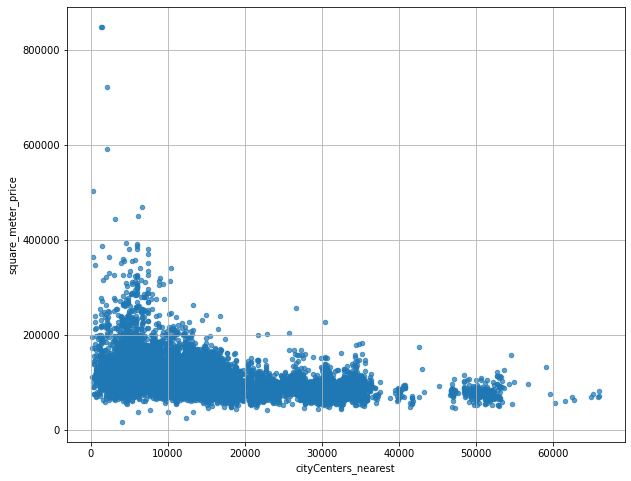

In [57]:
data.plot(x = 'cityCenters_nearest' , y = 'square_meter_price', kind = 'scatter', alpha = 0.7, grid=True, figsize=(10, 8))

In [58]:
data['cityCenters_nearest'].corr(data['square_meter_price'])

-0.3737903199835343

Заметна тенденция к снижению цены при удалении от центра.  
Проверяем зависимость цены квадратного метра от этажа.

In [59]:
data.pivot_table(index = 'floor_group', values = 'square_meter_price')

,square_meter_price
floor_group,
другой,100173.048562
первый,80010.149076
последний,88155.573367


Цена ниже на квартиры на первом и последнем этаже.  
Проверяем зависимость цены квадратного метра от дня недели размещения.

In [60]:
data.pivot_table(index = 'week_day_exposition', values = 'square_meter_price')

,square_meter_price
week_day_exposition,
0,96150.868418
1,96535.077594
2,96755.289528
3,96177.041075
4,95284.881663
5,94175.869901
6,94894.359559


Объявления о продаже, размщённые в конце недели ниже по цене.  
Проверяем зависимость цены квадратного метра от даты (месяца и года) размещения.

In [64]:
data.pivot_table(index = 'month_exposition', values = 'square_meter_price')

,square_meter_price
month_exposition,
1,96680.639079
2,95416.548954
3,95686.510405
4,97579.362448
5,94958.520923
6,94868.700033
7,94369.597686
8,97208.520493
9,96780.454165


В апреле, августе и сентябре можно ожидать увеличения средней стоимости квадратного метра. Тогда как в мае, июне и июле, наоборот - цены самые низкие.  
Смотрим на корреляцию цены квадратного метра и удалённости от парков, водоёмов и аэропортов.

0.032949276714970124

<AxesSubplot:ylabel='Frequency'>

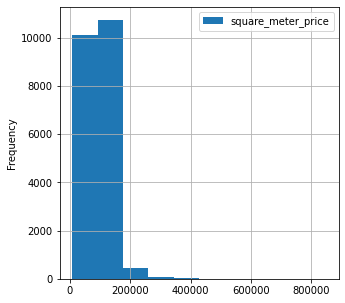

In [65]:
display(data['parks_nearest'].corr(data['square_meter_price']))
data.plot(x = 'parks_nearest', y = 'square_meter_price', kind = 'hist', grid=True, figsize=(5, 5))

-0.09605542286331488

<AxesSubplot:ylabel='Frequency'>

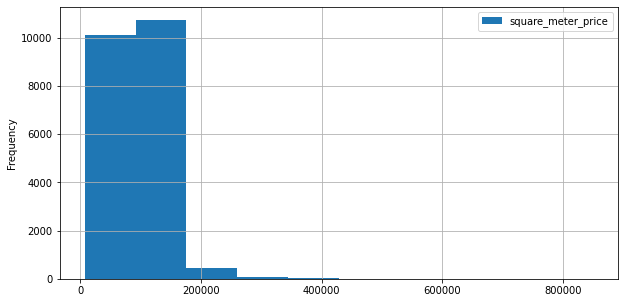

In [66]:
display(data['ponds_nearest'].corr(data['square_meter_price']))
data.plot(x = 'ponds_nearest', y = 'square_meter_price', kind = 'hist', grid=True, figsize=(10, 5))

-0.041313619640692384

<AxesSubplot:ylabel='Frequency'>

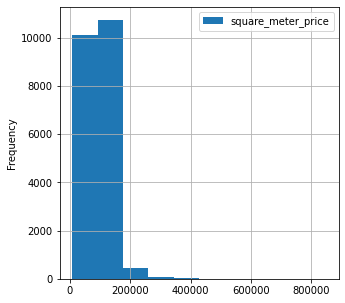

In [67]:
display(data['airports_nearest'].corr(data['square_meter_price']))
data.plot(x = 'airports_nearest', y = 'square_meter_price', kind = 'hist', grid=True, figsize=(5, 5))

Проверяем зависимость цены квадратного метра и квартир с открытой планировкой и апартаментами.

In [68]:
data.pivot_table(index = 'open_plan', values = 'square_meter_price')

,square_meter_price
open_plan,
False,95908.881366
True,103531.825024


In [69]:
data.pivot_table(index = 'is_apartment', values = 'square_meter_price')

,square_meter_price
is_apartment,
False,95874.672077
True,129541.601099


Выделяю 10 населённых пунктов с наибольшим числом объявлений. Считаю среднюю цену квадратного метра в этих населённых пунктах.

In [70]:
top = data.pivot_table(index = 'locality_name', values = 'square_meter_price', aggfunc = ['count', 'mean'], margins=True).reset_index()
top.sort_values(('count', 'square_meter_price'), ascending=False).head(11)

,locality_name,count,mean
,,square_meter_price,square_meter_price
358,All,21428,95928.091696
33,Санкт-Петербург,14164,110554.796820
287,посёлок Мурино,414,83828.855568
321,посёлок Шушары,398,77354.261832
3,Всеволожск,362,68061.358764
32,Пушкин,339,102480.671537
13,Колпино,329,75338.128182
6,Гатчина,294,68617.661039
292,посёлок Парголово,255,88250.465137


Выделяю населённые пункты с самой высокой и низкой стоимостью жилья.

In [71]:
top.loc[top['mean', 'square_meter_price'] == top['mean', 'square_meter_price'].max()]

,locality_name,count,mean
,,square_meter_price,square_meter_price
282,посёлок Лисий Нос,2,121616.221359


In [72]:
top.loc[top['mean', 'square_meter_price'] == top['mean', 'square_meter_price'].min()]

,locality_name,count,mean
,,square_meter_price,square_meter_price
138,деревня Старополье,3,11206.221198


Выбираю квартиры только в Санкт-Петербурге.  
Добавляю столбец с расстоянием до центра в километрах.  
Считаю среднюю цену для каждого километра.  
И строю график зависимости цены кв.метра от удалённости от центра.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

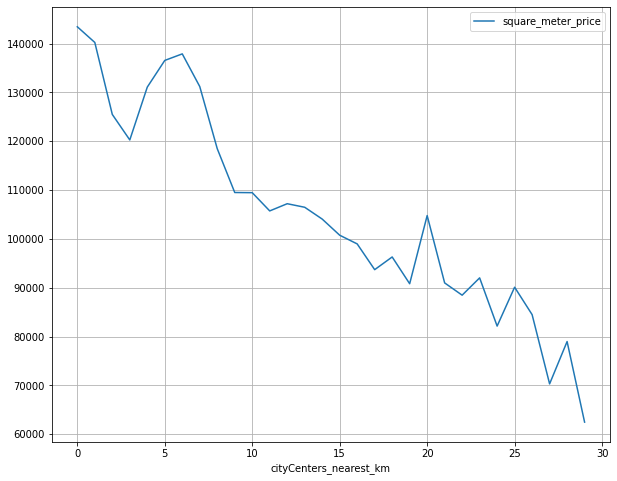

In [73]:
data_SaintPt = data.loc[data['locality_name'] == 'Санкт-Петербург']
data_SaintPt['cityCenters_nearest_km'] = data_SaintPt['cityCenters_nearest'] // 1000
data_SaintPt.pivot_table(index = 'cityCenters_nearest_km', values = 'square_meter_price').plot(grid=True, figsize=(10, 8))

Предполагаю, что квартирами "в центре" могут считаться лоты удаленностью не более 10 км.
Выделяю их в отдельный датафейм.

In [74]:
data_SaintPT_center = data_SaintPt.query('cityCenters_nearest_km < 10')

Строю гистограмму по общей площади

<AxesSubplot:>

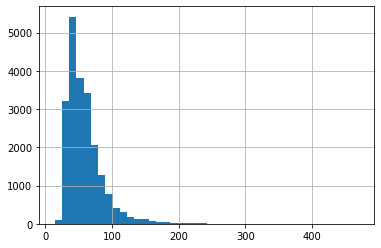

In [75]:
data['total_area'].hist(bins = 42)

(0.0, 200.0)

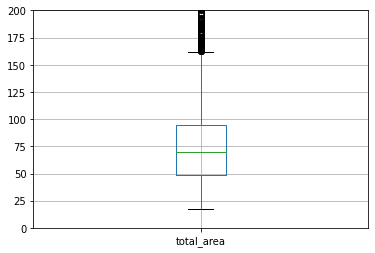

In [76]:
data_SaintPT_center.boxplot(column=['total_area'])
plt.ylim([0, 200])

Основная часть объявлений - квартиры площадью от 50 до 100 кв.метров. Это больше, чем в целом по региону. Редкими будут лоты свыше 160 метров.  
Строю гистограмму по цене.

<AxesSubplot:>

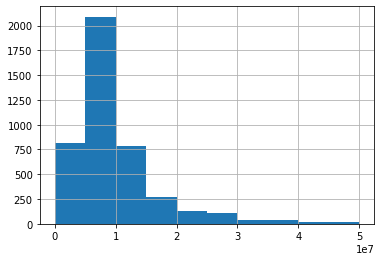

In [77]:
data_SaintPT_center['last_price'].hist(range = (0, 50000000), bins=10)

В Санкт-Петербурге выше доля более дорогих лотов. На графике пик сместился на диапозон с 5 до 10 млн.   
Строим гистограмму по кол-ву комнат.

<AxesSubplot:>

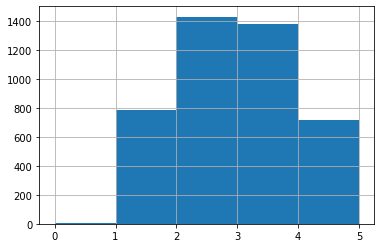

In [78]:
data_SaintPT_center['rooms'].hist(bins=5)

Особенного отличия общей базы и картир Санкт-Петербурга по кол-ву комнат не обнаружено.  
Строим гистограмму по высоте потолков.

<AxesSubplot:>

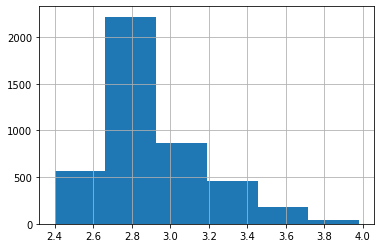

In [79]:
data_SaintPT_center['ceiling_height'].hist(bins=6)

Особенного отличия общей базы и квартир Санкт-Петербурга по потолков не обнаружено.  
Рассмотрим завосимость цены квадратного метра и числа комнат.

In [80]:
data_SaintPT_center.pivot_table(index = 'rooms' , values = 'square_meter_price')

,square_meter_price
rooms,
0,129717.097171
1,134601.732904
2,127147.831072
3,126398.619551
4,119518.001620
5,113618.367614


In [81]:
data_SaintPT_center['rooms'].corr(data['square_meter_price'])

-0.09616024146448138

Так же как и в общей базе - цена квадратного метра снижается по мере увеличения числа комнат.   
Смотрим зависимость цены и этажа.

In [82]:
data_SaintPT_center.pivot_table(index = 'floor_group' , values = 'square_meter_price')

,square_meter_price
floor_group,
другой,129827.141111
первый,111793.517298
последний,122785.728237


Здесь так же, как и в целом по региону: первый и последний этаж дешевле.    
Смотрим зависимость даты размещения объявления.

<AxesSubplot:xlabel='ceiling_height'>

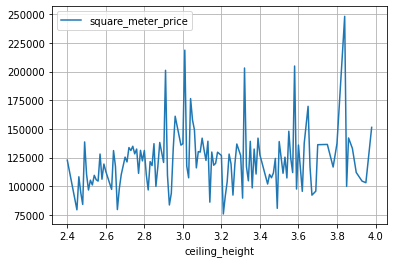

In [83]:
(
    data_SaintPT_center
    .pivot_table(index = 'ceiling_height', values = 'square_meter_price')
    .plot(grid=True)
)

In [84]:
data_SaintPT_center['ceiling_height'].corr(data['square_meter_price'])

0.09662629129400421

График неоднородный с большим кол-вом пиков и провалов. И коэффициент корреляцие далёк от еденицы. Взаимосвязь цены от высоты потолка не прослеживатеся.

In [86]:
data_SaintPT_center.pivot_table(index = 'week_day_exposition', values = 'square_meter_price')

,square_meter_price
week_day_exposition,
0,128892.593760
1,126191.603933
2,127620.293228
3,125632.464045
4,124690.359536
5,128511.700916
6,127290.210190


In [87]:
data_SaintPT_center['week_day_exposition'].corr(data['square_meter_price'])

-0.01080830156074526

В центральной части Санкт-Петербурге самые "дешевые" дни, так же как и в регионе в целом, приходятся на конец недели. Только в центре - это конец рабочей недели - четверг и пятница.

In [89]:
data_SaintPT_center.pivot_table(index = 'month_exposition', values = 'square_meter_price')

,square_meter_price
month_exposition,
1,127918.093174
2,125770.295686
3,128198.392101
4,129953.129659
5,122529.895297
6,128780.629439
7,122208.397109
8,129633.039726
9,125046.190954


В центре СПб пиковые месяца по цене квадратного метра несколько отличаются, чем в регионе в целом. Наибольшую стоимость можно ожидать в апреле и августе (сентябрьского пика нет), а самый "дешёвый месяц" - июль.

## Общий вывод

По изученым данным, основные параметры, влияющие на стоимость объекта недвижимости являются:
1) Общая площадь квартиры. Как в целом по региону, так и для Санкт-Петербурга, влияние этого фактора можно разделсть на две части. Для квартир с площадью от 10 до 60 кв.м с уменьшением площади квартиры - цена квадратного метра увеличивается. А для квартир, площадью от 60 кв.м - с увеличением площади растёт и цена.  
2) Число комнат. Для города Санкт-Петербурга этот показатель однозначен: с увеличением кол-ва комнат, снижается цена квадратного метра. Для региона в целом - всё не так одназначно. Для четырёхкомнатных квартир и более цена квадратного метра растёт.  
3) Этаж. Как в целом по региону, так и для Санкт-Петербурга дешевле квартиры на первом и последнем этажах.  
4) Удалённость от центра. При приближении к центру города цена кв.метра возрастает.

Свободня планировка. Квартиры с открытой планировкой дороже. Представленная выборки не очень большая, поэтому этот параметр требует дополнительной проверки.
Апартаменты. Стоимость такого типа жилья дороже. Но так же, как и в случае со свободной планировкой - выборка минимальная и результаты могут быть недостоверными.
